# Running GSEA and differential gene expression modules

### what is GSEA?

Gene Set Enrichment Analysis (GSEA) is a computational method that determines whether an a priori defined set of genes shows statistically
significant, concordant differences between two biological states
(e.g. phenotypes).


### Installing GSEApy

in your terminal run:

conda install -c bioconda gseapy

In [2]:
# importing modules
import gseapy as gp
import pandas as pd
import numpy as np

In [108]:
# reading in data

fold_change_data=pd.read_csv("/Users/tjsears/Code/2022-MSTP-Bioinformatics-Bootcamp/Day_3/GSE84896_BT474_Parental_Persister_CuffDiff.txt",sep="\t")

### formatting into rnk file

what is an rnk file supposed to look like?

You can sort by fold change in this case

Gene  Value \
ATXN1 16.456753 \
UBQLN4	13.989493 \
CALM1	13.745533 \
DLG4	12.796588 \
MRE11A	12.787631 

In [109]:
fold_change_data.head()

,Gene ID,RefSeq IDs,Parental FPKM,Persister FPKM,q_value,foldchange
0,A1BG,NM_130786,0.074532,0.210925,3.479700e-02,2.83
1,A1CF,"NM_001198818,NM_001198819,NM_001198820,NM_0145...",0.019753,0.068019,5.120000e-07,3.44
2,A2M,NM_000014,0.013753,0.015075,1.000000e+00,1.1
3,A2ML1,NM_144670,0.451260,0.276157,5.526930e-04,0.61
4,A4GALT,NM_017436,0.190740,0.745519,4.660000e-15,3.91


In [110]:
# let's subset the dataframe down to columns of interest

fold_change_data=fold_change_data[fold_change_data['foldchange']!="Not Determined"]
fold_change_data['foldchange'] = pd.to_numeric(fold_change_data['foldchange'])

#make a new column that describes log2foldchange
fold_change_data["log2foldchange"]=np.log2(fold_change_data["Parental FPKM"] / fold_change_data["Persister FPKM"])

#save a version for later plotting
fold_change_data_plot=fold_change_data

# can you determine which column names you should specify below?
fold_change_data=fold_change_data[["Gene ID","foldchange"]]

In [42]:
# now we need to sort the rnk file

fold_change_data=fold_change_data.sort_values(by="foldchange",ascending=True)

In [44]:
# run GSEA
pre_res = gp.prerank(rnk=fold_change_data, # or rnk = rnk,
                     gene_sets='KEGG_2016',
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )

2023-08-01 20:50:40,854 Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2023-08-01 20:50:40,876 Parsing data files for GSEA.............................
2023-08-01 20:50:40,876 Downloading and generating Enrichr library gene sets......
2023-08-01 20:50:55,670 0002 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-08-01 20:50:55,671 0291 gene_sets used for further statistical testing.....
2023-08-01 20:50:55,672 Start to run GSEA...Might take a while..................
2023-08-01 20:55:55,354 Start to generate gseapy reports, and produce figures...
2023-08-01 20:55:55,364 Congratulations. GSEApy run successfully................



In [72]:
# import plotting functions
import matplotlib.pyplot as plt

In [88]:
pre_res.res2d=pre_res.res2d[pre_res.res2d["fdr"]<0.05]

In [94]:
# take the top and bottom 5 gene sets
plot_df=pd.concat([pre_res.res2d.head(n=5),pre_res.res2d.tail(n=5)],axis=0)
plot_df

,es,nes,pval,fdr,geneset_size,matched_size,genes
Term,,,,,,,
Ubiquinone and other terpenoid-quinone biosynthesis Homo sapiens hsa00130,-0.610312,-2.361380,0.00000,0.000000,11,11,"VKORC1L1,HPD,COQ7,GGCX,COQ5,COQ6,NQO1,VKORC1,C..."
Citrate cycle (TCA cycle) Homo sapiens hsa00020,-0.455208,-2.834915,0.00000,0.000000,30,30,"OGDHL,IDH3B,OGDH,DLST,MDH1,SDHD,ACO2,SDHC,PDHA..."
Proteasome Homo sapiens hsa03050,-0.419431,-3.156118,0.00000,0.000000,44,44,"PSMB10,PSMB8,PSMA8,PSMB9,IFNG,PSMD1,PSMF1,PSMC..."
Ribosome biogenesis in eukaryotes Homo sapiens hsa03008,-0.271965,-2.625447,0.00000,0.000000,89,71,"REXO2,REXO1,RPP25L,NXF3,NXF1,NXF5,MDN1,XRN2,CS..."
DNA replication Homo sapiens hsa03030,-0.537943,-3.685151,0.00000,0.000000,36,36,"POLD4,RPA4,RFC1,RNASEH2C,SSBP1,RPA2,POLA1,RNAS..."
Protein export Homo sapiens hsa03060,-0.397916,-2.062290,0.00000,0.004291,23,22,"IMMP2L,SEC11A,SEC63,SPCS3,HSPA5,OXA1L,SRP14,SE..."
Mismatch repair Homo sapiens hsa03430,-0.355015,-1.803985,0.00000,0.015017,23,23,"POLD4,MLH3,PMS2,RPA4,RFC1,SSBP1,MSH3,RPA2,MLH1..."
Nucleotide excision repair Homo sapiens hsa03420,-0.206732,-1.717530,0.00000,0.026458,47,43,"ERCC5,ERCC4,CUL4B,GTF2H1,POLD4,ERCC6,GTF2H4,CD..."
Terpenoid backbone biosynthesis Homo sapiens hsa00900,-0.347638,-1.717535,0.00000,0.026458,22,21,"FNTA,IDI2,MVK,PCYOX1,DHDDS,ZMPSTE24,RCE1,NUS1,..."


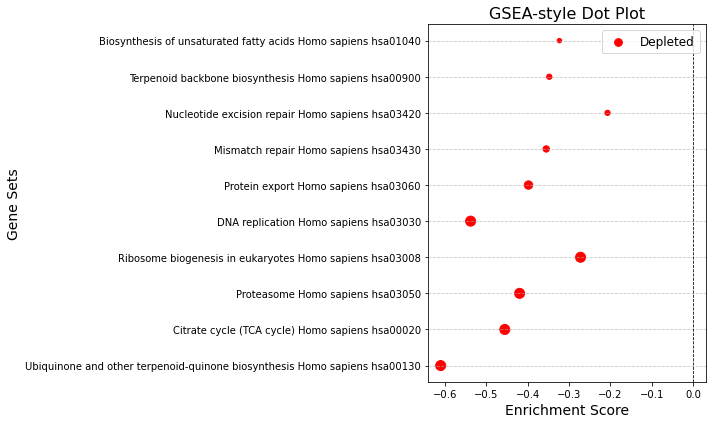

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace these with your actual data)
enrichment_scores = plot_df["es"]
fdr_values = plot_df["fdr"]
gene_sets = list(plot_df.index.values)

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set colors for positive and negative enrichment scores
positive_color = 'green'
negative_color = 'red'

# Determine dot size based on FDR values
dot_size = [1/(fdr_value+0.01) for fdr_value in fdr_values]

# Plot negative enrichment scores (to the left of x=0)
ax.scatter(enrichment_scores, gene_sets, s=dot_size, color=negative_color, label='Depleted', marker='o')

# Add vertical line at x=0
ax.axvline(0, color='black', linestyle='--', linewidth=0.8)

# Set x and y axis labels
ax.set_xlabel('Enrichment Score', fontsize=14)
ax.set_ylabel('Gene Sets', fontsize=14)

# Add y-axis grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add title
plt.title('GSEA Dot Plot', fontsize=16)

# Add legend
ax.legend(loc='upper right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### what are volcano plots?

volcano plots are a neat way to visualize differences between gene expression between conditions

In [111]:
# plot volcano plot

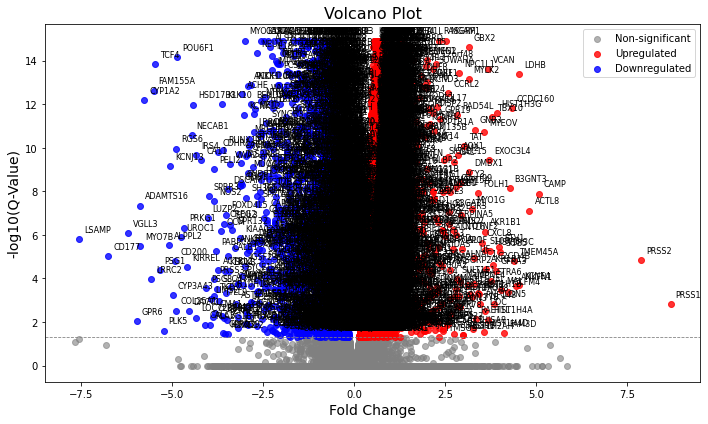

In [120]:
df=fold_change_data_plot

fold_change = df['log2foldchange']
q_values = df['q_value']
gene_names = df['Gene ID']
# Compute the negative logarithm of q-values (base 10)
log_q_values = -np.log10(q_values)

# Create a scatter plot (volcano plot)
plt.figure(figsize=(10, 6))

# Plot non-significant points (gray dots)
plt.scatter(fold_change[q_values > 0.05], log_q_values[q_values > 0.05], color='gray', alpha=0.6, label='Non-significant')

# Plot significantly upregulated genes (red dots)
significant_up = (q_values <= 0.05) & (fold_change > 0)
plt.scatter(fold_change[significant_up], log_q_values[significant_up], color='red', alpha=0.8, label='Upregulated')

# Plot significantly downregulated genes (blue dots)
significant_down = (q_values <= 0.05) & (fold_change < 0)
plt.scatter(fold_change[significant_down], log_q_values[significant_down], color='blue', alpha=0.8, label='Downregulated')

# Add horizontal line at -log10(q-value) = 1.3 (corresponding to q-value = 0.05)
plt.axhline(y=1.3, color='gray', linestyle='--', linewidth=0.8)

# Set axis labels and title
plt.xlabel('Fold Change', fontsize=14)
plt.ylabel('-log10(Q-Value)', fontsize=14)
plt.title('Volcano Plot', fontsize=16)

# Annotate significant samples with gene names
significant_genes = gene_names[q_values <= 0.05]
for gene_name, fc, log_q in zip(significant_genes, fold_change[q_values <= 0.05], log_q_values[q_values <= 0.05]):
    plt.annotate(gene_name, xy=(fc, log_q), xytext=(5, 5), textcoords='offset points', fontsize=8, ha='left', va='bottom')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# TCGA experimentation

In [ ]:
# use top genes/pathways from analysis within TCGA

# do top persistor pathways predict immunogenicity, surivival, and ???

In [ ]:
rna_xcell=pd.read_csv("TCGA_composite_file.txt",sep="\t")

In [27]:
# set up stratification variable 

variable="CAMP"

mean=rna_xcell[variable].mean()
rna_xcell["group"]=np.where(rna_xcell[variable]>=mean,1,0)

#gene set example
#advanced task!
geneset=plot_df["genes"][0]
geneset

# some kind of linear combination of the genes from a given pathway?

NameError: name 'plot_df' is not defined

/var/folders/g3/0_9ybgzs17xbg8gczn186vpw0000gn/T/ipykernel_16463/1092479957.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surv_df_canc["OS"][surv_df_canc["OS"]=="Y"]=1.0
/var/folders/g3/0_9ybgzs17xbg8gczn186vpw0000gn/T/ipykernel_16463/1092479957.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surv_df_canc["OS"][surv_df_canc["OS"]=="Dead"]=1.0
/var/folders/g3/0_9ybgzs17xbg8gczn186vpw0000gn/T/ipykernel_16463/1092479957.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

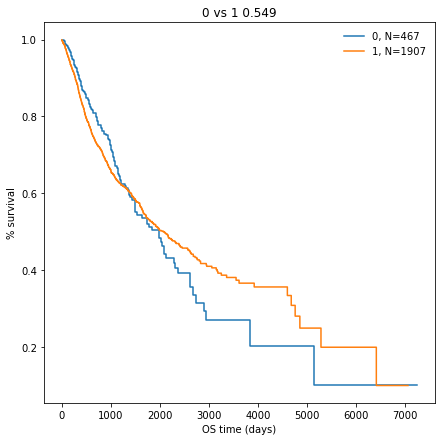

In [26]:
# plot km curves 
import matplotlib.pyplot as plt
import matplotlib
import lifelines #conda install -c conda-forge lifelines
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

surv_df_canc=rna_xcell

surv_df_canc=surv_df_canc.dropna(subset=["OS"])
surv_df_canc=surv_df_canc.dropna(subset=["OS.time"])

surv_df_canc["OS"][surv_df_canc["OS"]=="True"]=1.0
surv_df_canc["OS"][surv_df_canc["OS"]=="Y"]=1.0
surv_df_canc["OS"][surv_df_canc["OS"]=="Dead"]=1.0
surv_df_canc["OS"][surv_df_canc["OS"]=="False"]=0.0
surv_df_canc["OS"][surv_df_canc["OS"]=="Not available"]=0.0
surv_df_canc["OS"][surv_df_canc["OS"]=="Alive"]=0.0
surv_df_canc["OS"][surv_df_canc["OS"]=="Died not of Melanoma"]=0.0
surv_df_canc["OS"]=pd.to_numeric(surv_df_canc["OS"])

fig=plt.figure(figsize=(7,7))
ax1 = plt.subplot(1,1,1)

kmf = KaplanMeierFitter()

kmf.fit(surv_df_canc[surv_df_canc['group']==1]['OS.time'], surv_df_canc[surv_df_canc['group']==1]['OS'],label="0, N="+str(surv_df_canc[surv_df_canc['group']==1].shape[0]))
kmf.plot(ci_show=False, ax=ax1)
kmf.fit(surv_df_canc[surv_df_canc['group']==0]['OS.time'], surv_df_canc[surv_df_canc['group']==0]['OS'],label="1, N="+str(surv_df_canc[surv_df_canc['group']==0].shape[0]))
kmf.plot(ci_show=False, ax=ax1)

results = logrank_test(surv_df_canc[surv_df_canc["group"]==0]['OS.time'], surv_df_canc[surv_df_canc["group"]==1]['OS.time'],event_observed_A=surv_df_canc[surv_df_canc["group"]==0]['OS'], event_observed_B=surv_df_canc[surv_df_canc["group"]==1]['OS'], alpha=.95)

plt.ylabel('% survival')
plt.xlabel('OS time (days)')
plt.title("0 vs 1 "+str(np.round(results.p_value,4)))
plt.legend(frameon=False)


Text(0.5, 1.0, 'neither vs both 0.0')

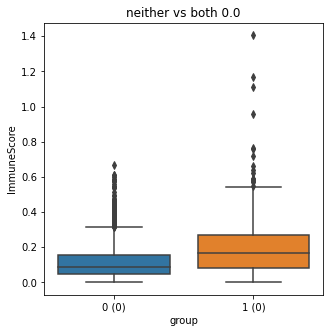

In [38]:
# immunoscore differences
import seaborn as sns # conda install seaborn
from scipy import stats # conda install scipy

surv_df_canc=rna_xcell
f=plt.figure(figsize=(5,5))

ax=sns.boxplot(x="group",y="ImmuneScore",data=surv_df_canc)

labels=[item.get_text() for item in ax.get_xticklabels()]
labels=[x+" ("+str(len(surv_df_canc[surv_df_canc["group"]==x]))+")" for x in labels]
ax.set_xticklabels(labels)

cat0 = surv_df_canc[(surv_df_canc["group"]==0)].fillna(0)
cat3 = surv_df_canc[(surv_df_canc["group"]==1)].fillna(0)

plt.title("neither vs both "+str(np.round(stats.ttest_ind(cat0["group"],cat3["group"])[1],20)))#+"\n"+"neither vs y "+str(np.round(stats.mannwhitneyu(cat0[x], cat2[x])[1],4))+"\n"+"both vs y "+str(np.round(stats.mannwhitneyu(cat2[x], cat3[x])[1],4))+"\n"+"both vs x "+str(np.round(stats.mannwhitneyu(cat1[x], cat3[x])[1],4))+"\n"+"x vs y "+str(np.round(stats.mannwhitneyu(cat2[x], cat1[x])[1],4)))

